In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

In [2]:
# make dataset for clustering
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,cluster_std=blob_std, random_state=7)

In [3]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [4]:
y_pred

array([4, 0, 2, ..., 3, 2, 0])

In [5]:
 kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [6]:
# predict new instance
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 3, 3])

In [7]:
# distance from each instance to every centroid
kmeans.transform(X_new)

array([[2.81093633, 1.49439034, 0.32995317, 2.9042344 , 2.88633901],
       [5.80730058, 4.4759332 , 2.80290755, 5.84739223, 5.84236351],
       [1.21475352, 1.69136631, 3.29399768, 0.29040966, 1.71086031],
       [0.72581411, 1.54808703, 3.21806371, 0.36159148, 1.21567622]])

In [8]:
# centroid intialization
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
y_pred = kmeans.fit_predict(X)

In [9]:
kmeans.inertia_

211.5985372581684

In [10]:
 kmeans.score(X)

-211.59853725816856

In [11]:
# batch kmeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [12]:
# elbow plot
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

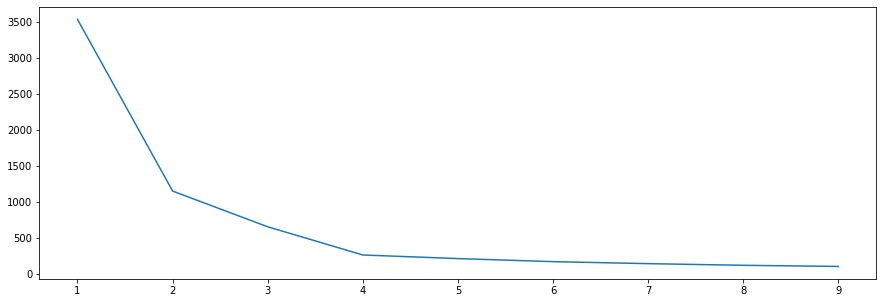

In [13]:
plt.figure(figsize=(15,5))
plt.plot(range(1,10),inertias)

In [14]:
# The silhouette coefficient can vary between -1 and +1: 
# a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters,
# while a coefficient close to 0 means that it is close to a cluster boundary, and finally a
# coefficient close to -1 means that the instance may have been assigned to the wrong cluster.
 silhouette_score(X, kmeans.labels_)

0.655517642572828

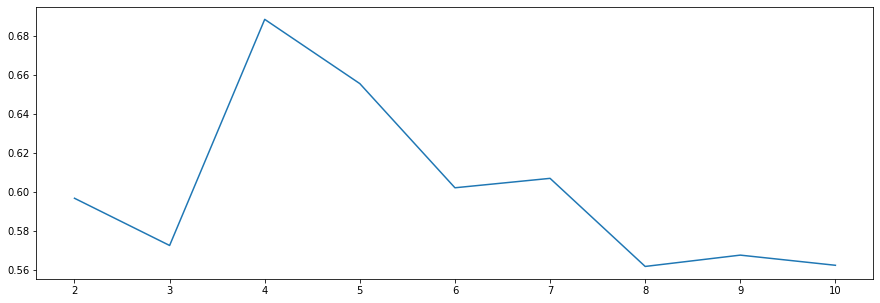

In [15]:
# plot silhouette score
# to plot silhouette we need min 2 clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(2, 11)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]
plt.figure(figsize=(15,5))
plt.plot(range(2,11),silhouette_scores)

In [16]:
# load mnist data
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)
log_reg = LogisticRegression(random_state=42,max_iter=10000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9666666666666667

In [17]:
# clustering as preprocessing steps 
# dimension reduction using kmeans clustering
pipeline = Pipeline([("kmeans", KMeans(n_clusters=50)),("log_reg", LogisticRegression(max_iter=10000)),])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9644444444444444

In [18]:
# finding best number of clusters using grid search
param_grid = dict(kmeans__n_clusters=range(2, 10))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.7s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.7s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   1.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.9s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   1.5s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   3.0s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   2.0s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   3.8s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................. kmeans__n_clusters=6, total=   6.8s
[CV] kmeans__n_clusters=6 ............................................


c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................. kmeans__n_clusters=6, total=   6.7s
[CV] kmeans__n_clusters=7 ............................................
[CV] ............................. kmeans__n_clusters=7, total=   5.1s
[CV] kmeans__n_clusters=7 ............................................
[CV] ............................. kmeans__n_clusters=7, total=   6.0s
[CV] kmeans__n_clusters=7 ............................................


c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................. kmeans__n_clusters=7, total=   7.1s
[CV] kmeans__n_clusters=8 ............................................


c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................. kmeans__n_clusters=8, total=   7.3s
[CV] kmeans__n_clusters=8 ............................................


c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................. kmeans__n_clusters=8, total=   6.8s
[CV] kmeans__n_clusters=8 ............................................


c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................. kmeans__n_clusters=8, total=   6.6s
[CV] kmeans__n_clusters=9 ............................................


c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................. kmeans__n_clusters=9, total=   6.8s
[CV] kmeans__n_clusters=9 ............................................
[CV] ............................. kmeans__n_clusters=9, total=   5.2s
[CV] kmeans__n_clusters=9 ............................................


c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  1.8min finished


[CV] ............................. kmeans__n_clusters=9, total=   6.6s


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                    

In [19]:
grid_clf.best_params_

{'kmeans__n_clusters': 9}

In [20]:
grid_clf.score(X_test, y_test)

0.9088888888888889

In [21]:
### clustering for semi supervised learning
n_labeled = 50
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.72

In [22]:
# semi supervised training
k = 50
kmeans = KMeans(n_clusters=k)

# compute distance of each instance from clusters
X_digits_dist = kmeans.fit_transform(X_train)

# find instance closest to each cluster
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

# label cluster with the label of closest instance label
X_representative_digits = X_train[representative_digit_idx]

# representative label
y_representative_label = y_train[representative_digit_idx]

In [23]:
# training on k representative sample
log_reg = LogisticRegression(max_iter = 10000)
log_reg.fit(X_representative_digits, y_representative_label)
log_reg.score(X_test, y_test)

0.8955555555555555

In [24]:
# labeling 
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_label[i]

In [25]:
# training on complete data
log_reg = LogisticRegression(max_iter = 10000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.92

In [26]:
# labeling only 20% instances which are closer to the centorid
# as some insatnces on far away from centroid may  be labelled incorrect

percentile_closest = 20

# get distance for each instance from its repsective cluster
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

    
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [27]:
# training on partial data
log_reg = LogisticRegression(max_iter = 10000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9244444444444444

In [28]:
# comparing partially propagated labels with acutal labels
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9965635738831615

In [29]:
# DBSCAN 
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [30]:
# Number of clusters in labels, ignoring noise if present.
labels = dbscan.labels_ 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_clusters_,n_noise_

(8, 59)

In [31]:
# no of anamolies in the dataset
sum(dbscan.labels_ == -1)

59

In [32]:
# len of core indices
len(dbscan.core_sample_indices_)

807

In [33]:
# core samples 
dbscan.core_sample_indices_[0:5]

array([0, 1, 2, 3, 4], dtype=int64)

In [34]:
# model to predict new instance
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [35]:
# predict new instance
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([0, 1, 3, 4], dtype=int64)

In [36]:
# predicting anamoly
# Finds the K-neighbors of a point.
# Returns indices of and distances to the neighbors of each point.
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)

# predict label
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]

# label instance as anamoly if distance creater than threshold
y_pred[y_dist > 0.2] = -1

y_pred.ravel()

array([-1,  1,  3, -1], dtype=int64)

In [37]:
## GMM Clustering
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [38]:
gm.weights_

array([0.59793576, 0.20101708, 0.20104716])

In [39]:
gm.means_

array([[ 0.5002724 ,  0.25024935],
       [-0.75183662,  0.55882134],
       [ 1.7503273 , -0.05512287]])

In [40]:
gm.covariances_

array([[[ 0.17430569, -0.10563556],
        [-0.10563556,  0.29156958]],

       [[ 0.05041506,  0.06034334],
        [ 0.06034334,  0.08830749]],

       [[ 0.04851845,  0.05757748],
        [ 0.05757748,  0.08603436]]])

In [41]:
gm.converged_

True

In [42]:
gm.n_iter_

18

In [43]:
gm.predict(X)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 2,
       0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 0,
       0, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2,

In [44]:
gm.predict_proba(X)

array([[1.17076603e-002, 9.88292340e-001, 1.31162611e-189],
       [9.99862326e-001, 3.00043103e-150, 1.37674458e-004],
       [1.00000000e+000, 8.95447709e-093, 7.43624640e-021],
       ...,
       [9.95201889e-001, 4.79811102e-003, 4.33712829e-146],
       [1.00000000e+000, 8.73573644e-091, 9.57581280e-022],
       [1.00000000e+000, 4.08337649e-022, 3.24624956e-083]])

In [45]:
# It is a generative model, meaning you can actually sample new instances from it 
# (note that they are ordered by cluster index)
X_new, y_new = gm.sample(6)

In [46]:
X_new

array([[ 0.59022659,  0.81040621],
       [ 0.73238613, -0.04895104],
       [ 0.61363565, -0.34429893],
       [ 0.2960753 ,  0.34102873],
       [ 1.15864666, -0.43385788],
       [ 1.74847345, -0.08797479]])

In [47]:
y_new

array([0, 0, 0, 0, 0, 2])

In [48]:
# Bayesian GMM
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.11, 0.2 , 0.14, 0.16, 0.15, 0.13, 0.1 , 0.  , 0.  , 0.  ])